<a href="https://colab.research.google.com/github/tirth5828/Codes/blob/main/Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE
import pandas as pd
from numpy import reshape
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Mounted at /gdrive
/gdrive


In [ ]:
list_of_languages = ["Arabic", "Creole", "Cebuano", "Esperanto", "German", "Swedish", "English", "French"]
name_list = ["Unigram" , "Bigram" , "Trigram"]
matrix_unigram = []
for i in range(len(list_of_languages)):
  matrix_unigram.append([])
  for j in range(len(list_of_languages)):
    matrix_unigram[i].append(0)

matrix_bigram = []
for i in range(len(list_of_languages)):
  matrix_bigram.append([])
  for j in range(len(list_of_languages)):
    matrix_bigram[i].append(0)
    
matrix_trigram = []
for i in range(len(list_of_languages)):
  matrix_trigram.append([])
  for j in range(len(list_of_languages)):
    matrix_trigram[i].append(0)


In [ ]:
for i,language1 in enumerate(list_of_languages):
  for j,language2 in enumerate(list_of_languages):
    with open(f'/gdrive/My Drive/Corpus/Bible/Bible1/{language1}/{language1}_{language2}_dot_product_unigram_phonemes.csv', 'r' , encoding = "ISO-8859-1") as a:
      matrix_unigram[i][j] = float(a.read())
    with open(f'/gdrive/My Drive/Corpus/Bible/Bible1/{language1}/{language1}_{language2}_dot_product_bigram_phonemes.csv', 'r' , encoding = "ISO-8859-1") as b:
      matrix_bigram[i][j] = float(b.read())
    with open(f'/gdrive/My Drive/Corpus/Bible/Bible1/{language1}/{language1}_{language2}_dot_product_trigram_phonemes.csv', 'r' , encoding = "ISO-8859-1") as c:
      matrix_trigram[i][j] = float(c.read())

In [ ]:
array_unigram = np.array(matrix_unigram)
array_bigram = np.array(matrix_bigram)
array_trigram = np.array(matrix_trigram)

arrays_list = [array_unigram,array_bigram,array_trigram]

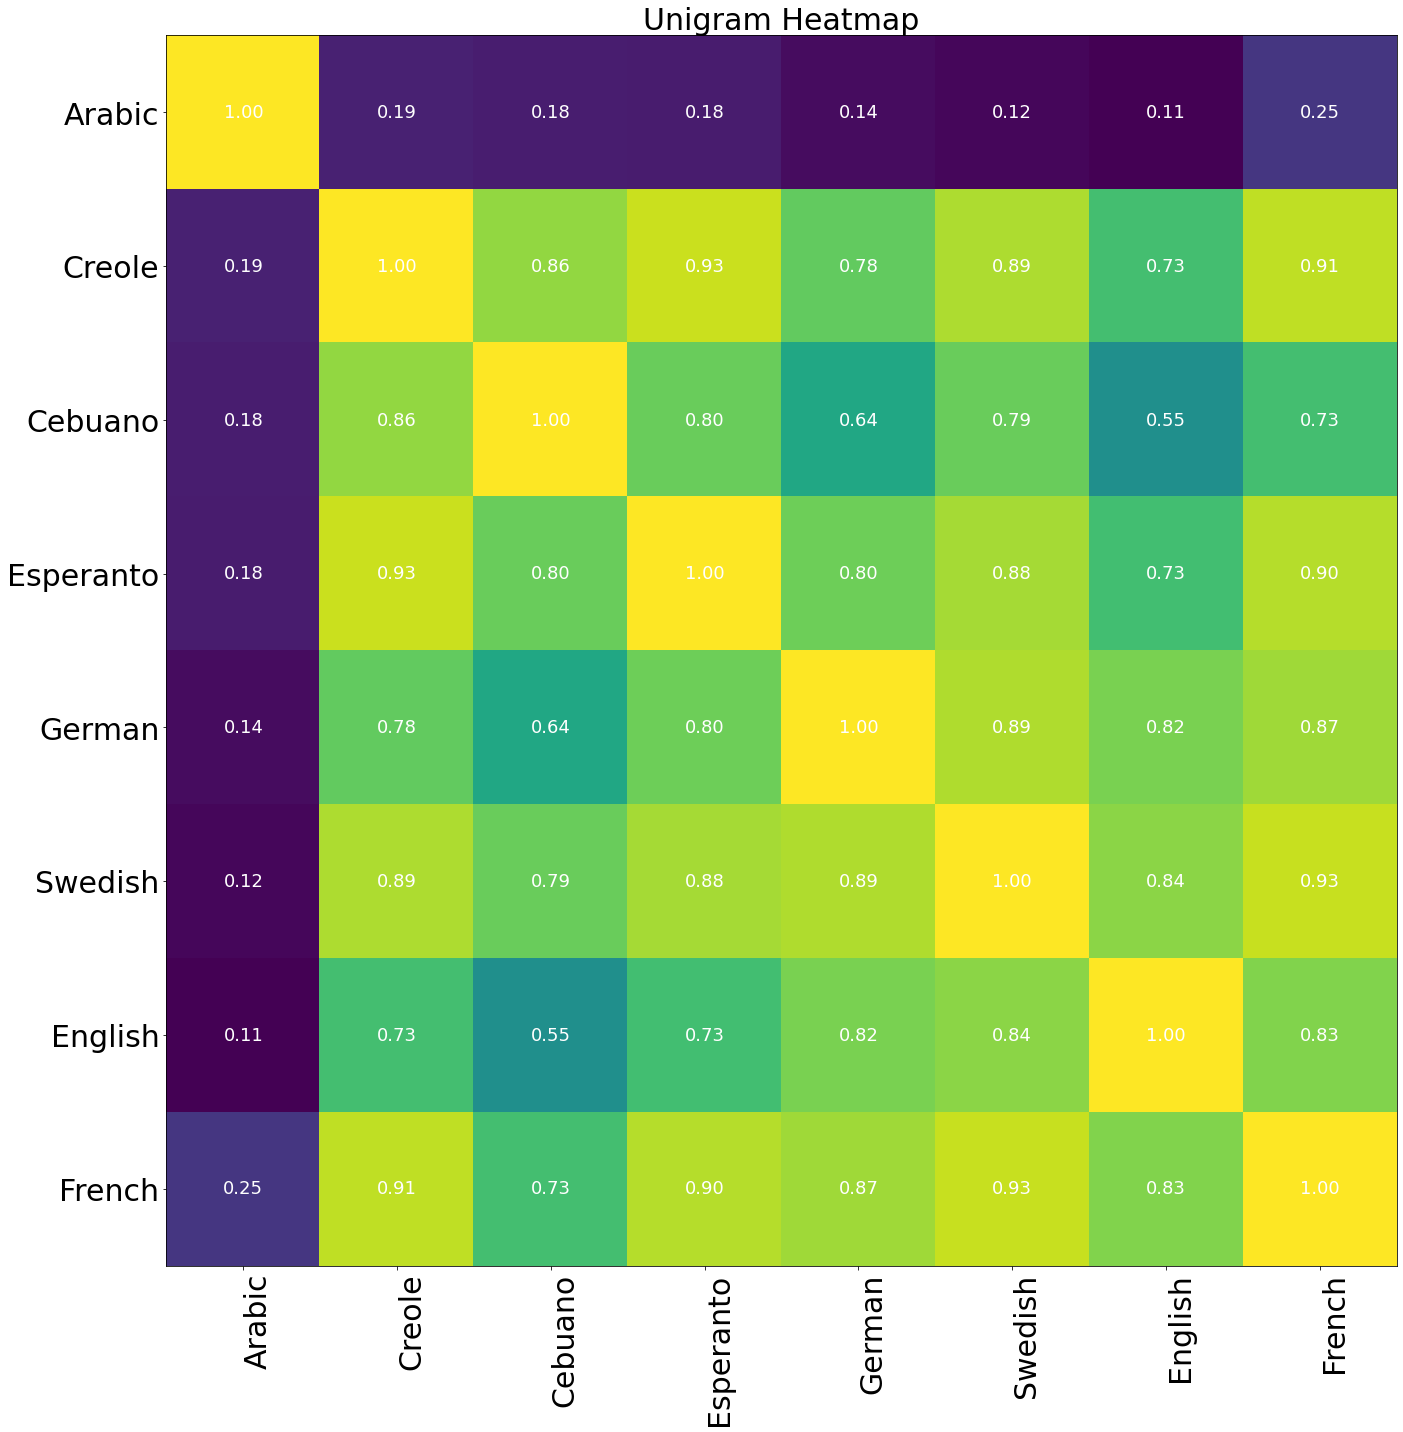

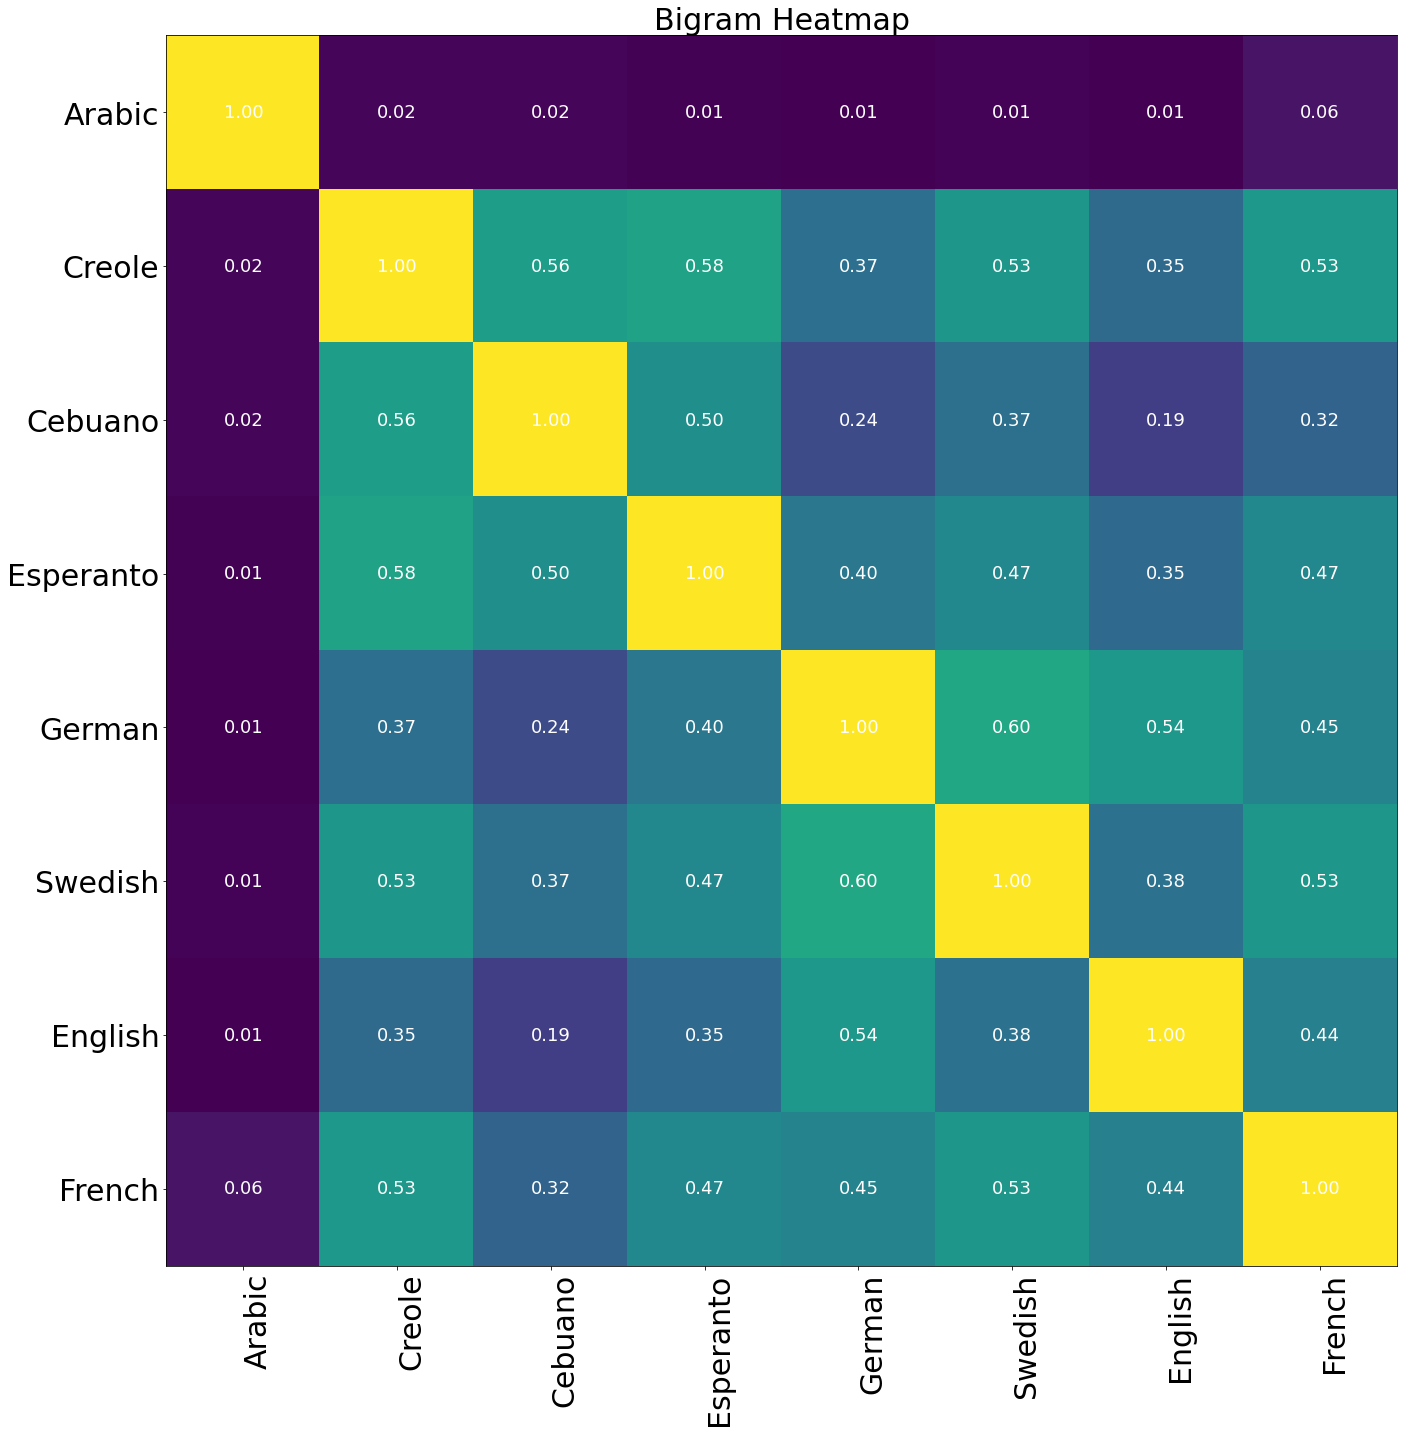

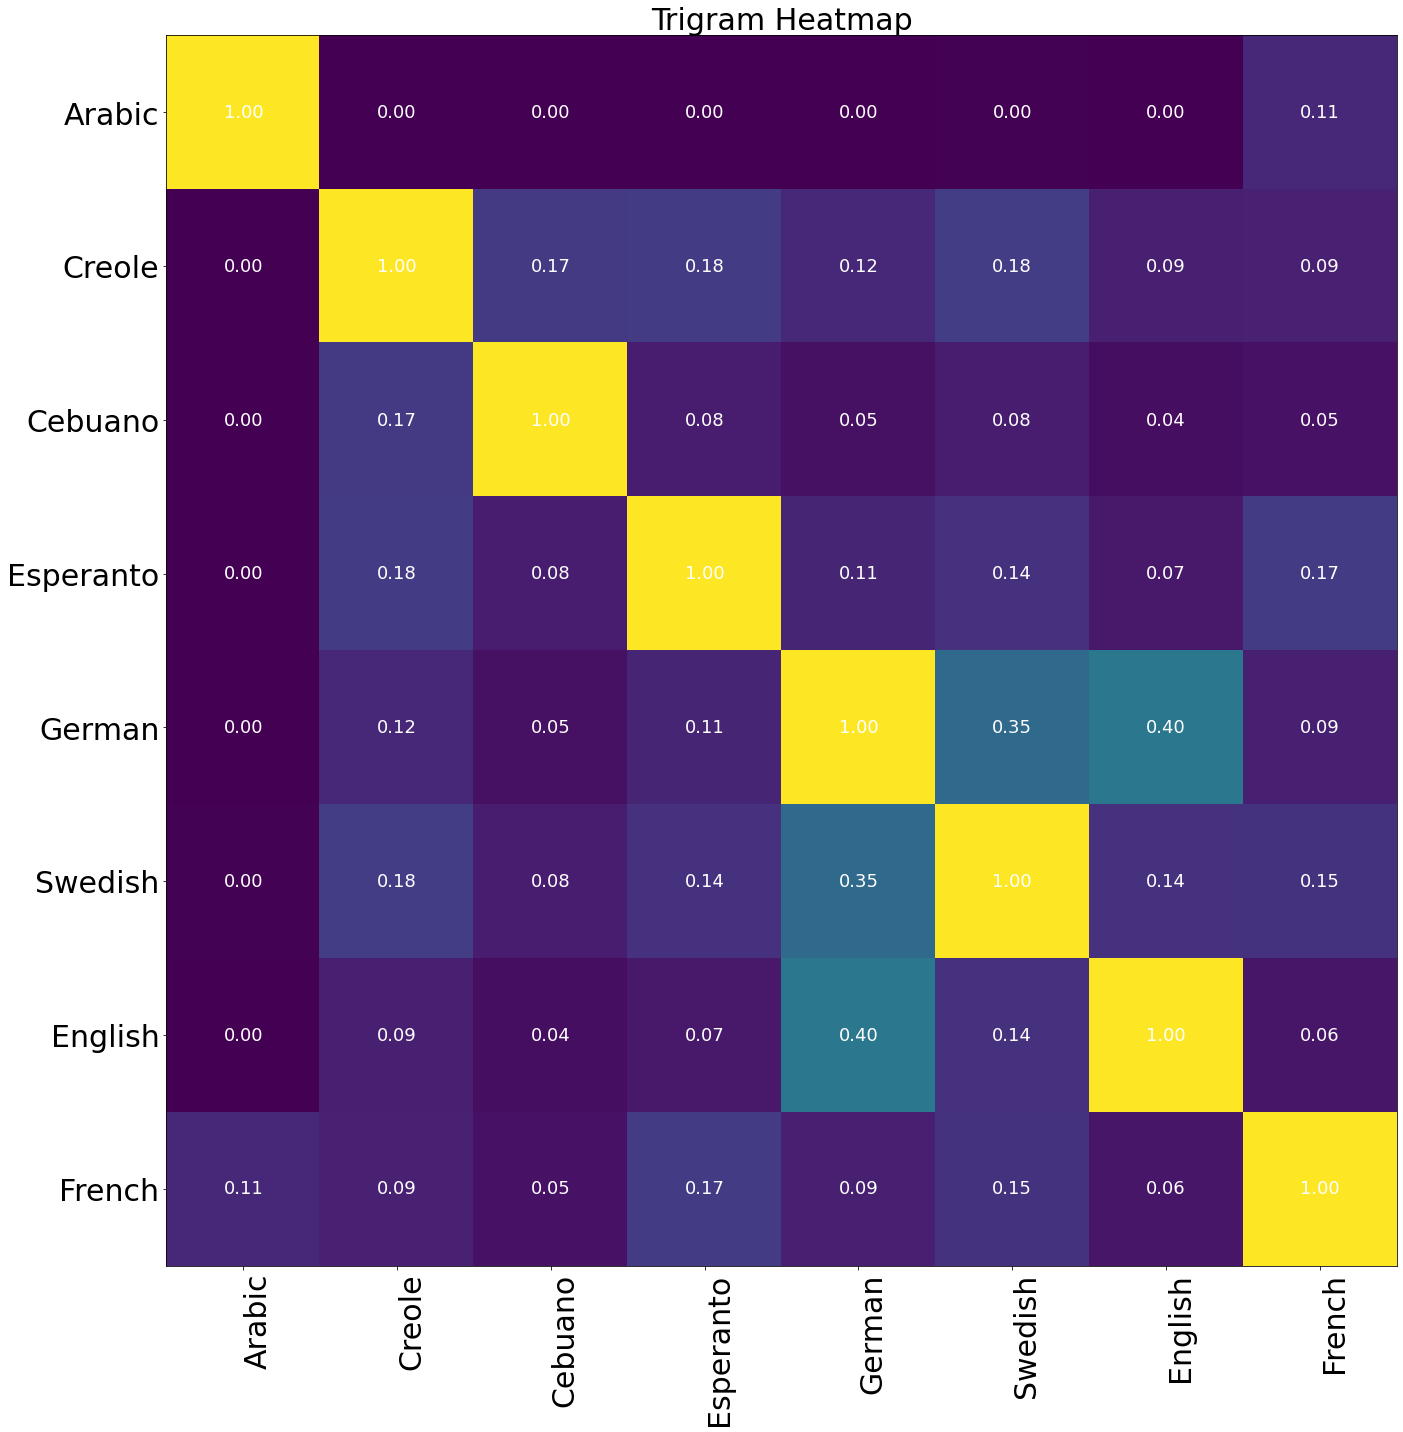

In [ ]:
for a,arrays in enumerate(arrays_list):  
  fig, ax = plt.subplots()
  im = ax.imshow(arrays)

  ax.set_xticks(np.arange(len(list_of_languages)))
  ax.set_yticks(np.arange(len(list_of_languages)))

  ax.set_xticklabels(list_of_languages,fontsize=30)
  ax.set_yticklabels(list_of_languages,fontsize=30)

  plt.setp(ax.get_xticklabels(), rotation=90, ha="right",
          rotation_mode="anchor")
  
  for i in range(len(list_of_languages)):
      for j in range(len(list_of_languages)):
          text = ax.text(j, i, "{:.2f}".format(arrays[i, j]),
                        ha="center", va="center", color="w", size=18, fontdict=None)

  plt.title(f"{name_list[a]} Heatmap",fontsize=30)

  fig.set_figwidth(20)
  fig.set_figheight(20)

  fig.tight_layout()
  plt.show()

In [ ]:
vector_unigram = []
vector_bigram = []
vector_trigram = []

In [ ]:
for i,language1 in enumerate(list_of_languages):
  with open(f'/gdrive/My Drive/Corpus/Bible/Bible1/{language1}/{language1}_unigram_phonemes.csv', 'r' , encoding = "ISO-8859-1") as d:
    vector_unigram.append(list(map(float , d.read().replace("[","").replace("]","").replace(" ","").split(","))))
  with open(f'/gdrive/My Drive/Corpus/Bible/Bible1/{language1}/{language1}_bigram_phonemes.csv', 'r' , encoding = "ISO-8859-1") as e:
    vector_bigram.append(list(map(float , e.read().replace("[","").replace("]","").replace(" ","").split(","))))
  with open(f'/gdrive/My Drive/Corpus/Bible/Bible1/{language1}/{language1}_trigram_phonemes.csv', 'r' , encoding = "ISO-8859-1") as f:
    vector_trigram.append(list(map( float , f.read().replace("[","").replace("]","").replace(" ","").split(","))))

In [ ]:
def getTSNE(array,title):
  X = np.array(array)
  X_embedded = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X)
  df = pd.DataFrame()
  df["y"] = pd.array(list_of_languages)
  df["comp-1"] = X_embedded[:,0]
  df["comp-2"] = X_embedded[:,1]

  sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                  palette=sns.color_palette("hls", 8),
                  data=df).set(title=f"{title} T-SNE projection") 
  

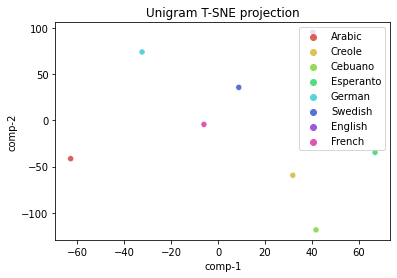

In [ ]:
getTSNE(vector_unigram,"Unigram")

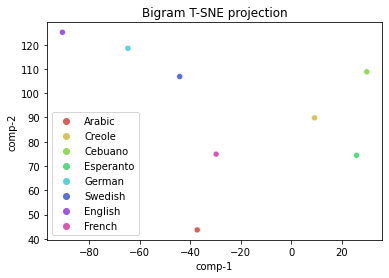

In [ ]:
getTSNE(vector_bigram,"Bigram")

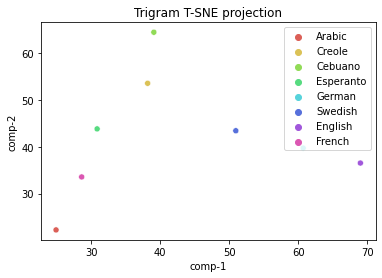

In [ ]:
getTSNE(vector_trigram,"Trigram")